In [1]:
%load_ext autoreload
%autoreload 2

from utilities.classes2 import *
from utilities.general import FPS
from utilities.plotting import plot_regression, plot_projection
from matplotlib import pyplot as plt

In [2]:
import numpy as np

In [3]:
training = np.load('../KernelPCovR/analysis/workspace/44510f9e5dec42b711c1467f03f7e504/training.npz')

In [4]:
X = training["X"][:2000]
Y = training["Y"][:2000]

fps, _ = FPS(X.T, 200)
X = X[:, fps]

# Mess with some shit
X += np.random.uniform(-0.5, 0.5, X.shape[1])
Y += np.random.uniform(-0.5, 0.5, Y.shape[1])

In [5]:
scp = {"linewidth": 0.5, "edgecolor":"k", "cbar": False}

In [6]:
pca_uncentered = PCA(n_PCA=2, scale=False, center=False)
pca_uncentered.fit(X)

pca_centered = PCA(n_PCA=2, scale=True, center=True)
pca_centered.fit(X)

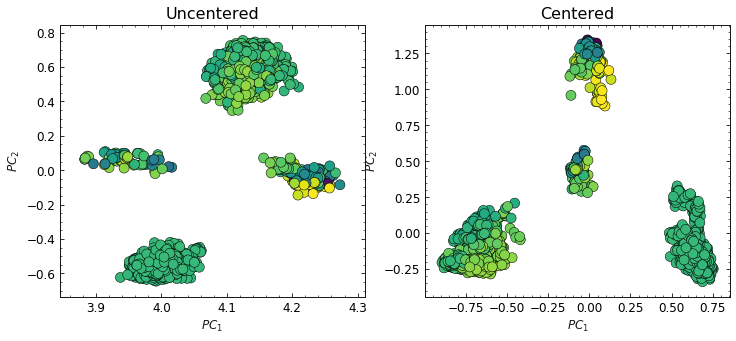

In [7]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_projection(Y, pca_uncentered.transform(X), 
                fig=fig, title='Uncentered', ax=ax[0], **scp)
plot_projection(Y, pca_centered.transform(X), 
                fig=fig, title='Centered', ax=ax[1], **scp)

In [8]:
lr_centered = LR(center=True, scale=True)
lr_centered.fit(X, Y)

lr_uncentered = LR(center=False, scale=False)
lr_uncentered.fit(X, Y)

Only plotting first column of Y
Only plotting first column of Y


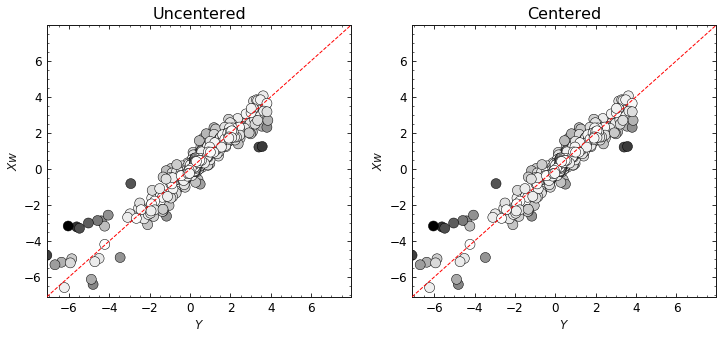

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_regression(Y, lr_uncentered.transform(X), 
                fig=fig, title='Uncentered', ax=ax[0], **scp)
plot_regression(Y, lr_centered.transform(X), 
                fig=fig, title='Centered', ax=ax[1], **scp)

In [10]:
K = np.matmul(X, X.T)

In [11]:
kpca_uncentered = KPCA(n_KPCA=2, scale=False, center=False)
kpca_uncentered.fit(K=K)

kpca_centered = KPCA(n_KPCA=2, scale=True, center=True)
kpca_centered.fit(K=K)

No input data supplied during fitting.                    
Transformations/statistics only available for kernel inputs.
Centering Kernel
No input data supplied during fitting.                    
Transformations/statistics only available for kernel inputs.


Centering Kernel


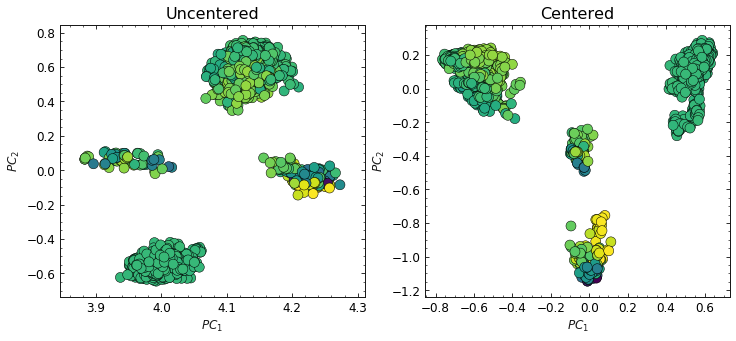

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_projection(Y, kpca_uncentered.transform(K=K), 
                fig=fig, title='Uncentered', ax=ax[0], **scp)
plot_projection(Y, kpca_centered.transform(K=K), 
                fig=fig, title='Centered', ax=ax[1], **scp)

In [13]:
krr_centered = KRR(center=True, scale=True)
krr_centered.fit(K=K, Y=Y)

krr_uncentered = KRR(center=False, scale=False)
krr_uncentered.fit(K=K, Y=Y)

Centering Kernel
No input data supplied during fitting.                    
Transformations/statistics only available for kernel inputs.
No input data supplied during fitting.                    
Transformations/statistics only available for kernel inputs.


Only plotting first column of Y
Centering Kernel
Only plotting first column of Y


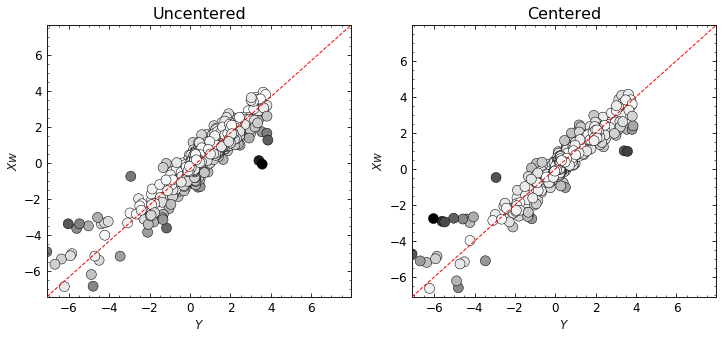

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_regression(Y, krr_uncentered.transform(K=K), 
                fig=fig, title='Uncentered', ax=ax[0], **scp)
plot_regression(Y, krr_centered.transform(K=K), 
                fig=fig, title='Centered', ax=ax[1], **scp)

In [15]:
fps_sparse, _ = FPS(X, 50)
X_sparse = X[fps_sparse]

In [16]:
Knm = np.matmul(X, X_sparse.T)
Kmm = np.matmul(X_sparse, X_sparse.T)

In [17]:
skpca_uncentered = SparseKPCA(n_KPCA=2, n_active=50,
                              scale=False, center=False)
skpca_uncentered.fit(X=X, Knm=Knm, Kmm=Kmm)

skpca_centered = SparseKPCA(n_KPCA=2, n_active=50,
                            scale=True, center=True)
skpca_centered.fit(X=X, Knm=Knm, Kmm=Kmm)

Centering Kernel
Centering Kernel


/Users/rosecers/Programs/miniconda/lib/python3.6/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1254: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


Centering Kernel


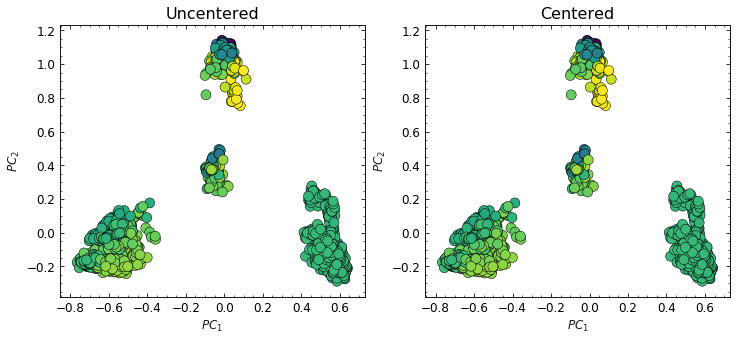

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_projection(Y, skpca_uncentered.transform(X=X, Knm=Knm), 
                fig=fig, title='Uncentered', ax=ax[0], **scp)
plot_projection(Y, skpca_centered.transform(X=X, Knm=Knm), 
                fig=fig, title='Centered', ax=ax[1], **scp)

In [19]:
skrr_centered = SparseKRR(n_active=50,center=True, scale=True)
skrr_centered.fit(X=X, Knm=Knm, Kmm=Kmm, Y=Y)

skrr_uncentered = SparseKRR(n_active=50, center=False, scale=False)
skrr_uncentered.fit(X=X, Knm=Knm, Kmm=Kmm, Y=Y)

Centering Kernel


Only plotting first column of Y
Centering Kernel
Only plotting first column of Y


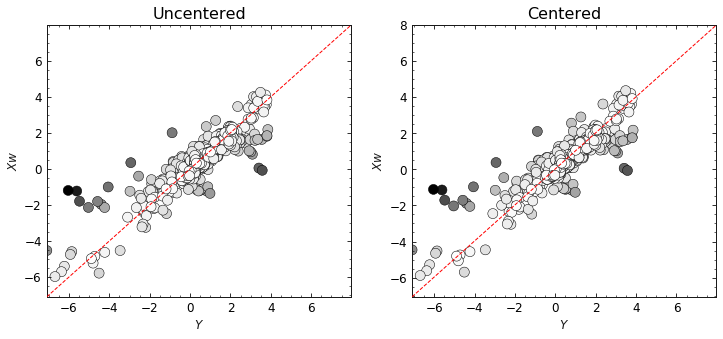

In [20]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_regression(Y, skrr_uncentered.transform(X=X, Knm=Knm), 
                fig=fig, title='Uncentered', ax=ax[0], **scp)
plot_regression(Y, skrr_centered.transform(X=X, Knm=Knm), 
                fig=fig, title='Centered', ax=ax[1], **scp)

In [21]:
PCovR_uncentered = PCovR(alpha=0.5, n_PCA=2, scale=False, center=False)
PCovR_uncentered.fit(X, Y)

PCovR_centered = PCovR(alpha=0.5, n_PCA=2, scale=True, center=True)
PCovR_centered.fit(X, Y)

# samples > # features, computing in feature space
# samples > # features, computing in feature space


Only plotting first column of Y
Only plotting first column of Y


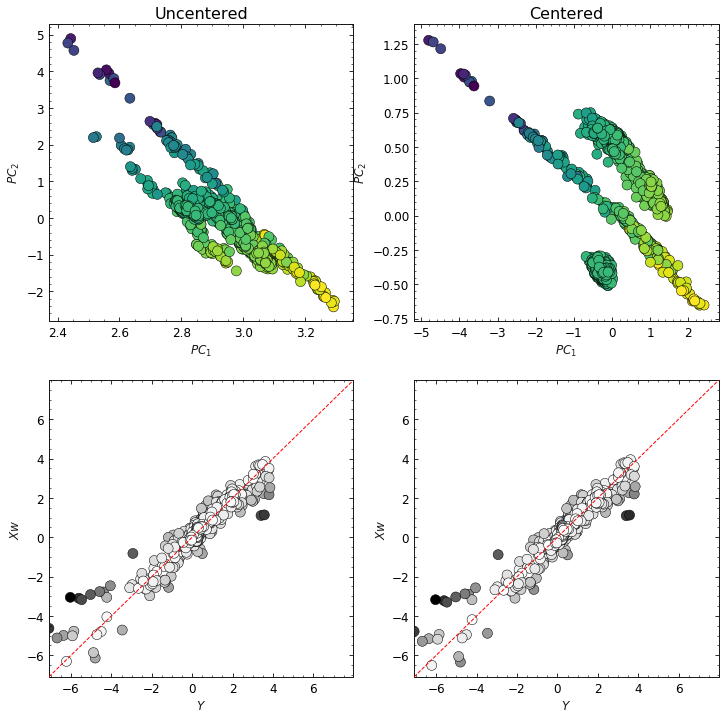

In [22]:
T_unc, Yp_unc, Xr_unc = PCovR_uncentered.transform(X)
T_c, Yp_c, Xr_c = PCovR_centered.transform(X)


fig, ax = plt.subplots(2,2, figsize=(12,12))
plot_projection(Y, T_unc, 
                fig=fig, title='Uncentered', ax=ax[0][0], **scp)
plot_projection(Y, T_c,
                fig=fig, title='Centered', ax=ax[0][1], **scp)
plot_regression(Y, Yp_unc, 
                fig=fig, ax=ax[1][0], **scp)
plot_regression(Y, Yp_c,
                fig=fig, ax=ax[1][1], **scp)

In [ ]:
KPCovR_uncentered = KPCovR(alpha=0.5, n_PCA=2, scale=False, center=False)
KPCovR_uncentered.fit(X, Y, K=K)

KPCovR_centered = KPCovR(alpha=0.5, n_PCA=2, scale=True, center=True)
KPCovR_centered.fit(X, Y, K=K)

In [ ]:
T_unc, Yp_unc, Xr_unc = KPCovR_uncentered.transform(K=K)
T_c, Yp_c, Xr_c = KPCovR_centered.transform(K=K)


fig, ax = plt.subplots(2,2, figsize=(12,12))
plot_projection(Y, T_unc, 
                fig=fig, title='Uncentered', ax=ax[0][0], **scp)
plot_projection(Y, T_c,
                fig=fig, title='Centered', ax=ax[0][1], **scp)
plot_regression(Y, Yp_unc, 
                fig=fig, ax=ax[1][0], **scp)
plot_regression(Y, Yp_c,
                fig=fig, ax=ax[1][1], **scp)

In [ ]:
skpcovr_uncentered = SparseKPCovR(alpha=0.5, n_PCA=2, 
                                 n_active=50,
                                 scale=False, center=False)
skpcovr_uncentered.fit(X, Y, Knm=Knm, Kmm=Kmm)

skpcovr_centered = SparseKPCovR(alpha=0.5, n_PCA=2, 
                                 n_active=50,
                               scale=True, center=True)
skpcovr_centered.fit(X, Y, Knm=Knm, Kmm=Kmm)

In [ ]:
T_unc, Yp_unc, Xr_unc = skpcovr_uncentered.transform(X=X, Knm=Knm)
T_c, Yp_c, Xr_c = skpcovr_centered.transform(X=X, Knm=Knm)


fig, ax = plt.subplots(2,2, figsize=(12,12))
plot_projection(Y, T_unc, 
                fig=fig, title='Uncentered', ax=ax[0][0], **scp)
plot_projection(Y, T_c,
                fig=fig, title='Centered', ax=ax[0][1], **scp)
plot_regression(Y, Yp_unc, 
                fig=fig, ax=ax[1][0], **scp)
plot_regression(Y, Yp_c,
                fig=fig, ax=ax[1][1], **scp)